## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as pl

## Importing the dataset

In [2]:
df=pd.read_csv('/content/hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Data Cleaning

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
LCA        1
NCL        1
BHS        1
VGB        1
MRT        1
Name: country, Length: 177, dtype: int64

In [6]:
df['country']=df['country'].fillna('Unknown')

In [7]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [8]:
df['children'].median()

0.0

In [9]:
df['children']=df['children'].fillna(0.0)

In [10]:
df['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
213.0        1
433.0        1
197.0        1
367.0        1
337.0        1
Name: agent, Length: 333, dtype: int64

In [11]:
df['agent'].median()

14.0

In [12]:
df['agent']=df['agent'].fillna(14.0)

In [13]:
df['company'].value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
229.0      1
213.0      1
416.0      1
320.0      1
461.0      1
Name: company, Length: 352, dtype: int64

In [14]:
df['company'].median()

179.0

In [15]:
df['company']=df['company'].fillna(179.0)

## Data Transformation

In [16]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [17]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [18]:
df['hotel']=df['hotel'].replace(('City Hotel','Resort Hotel'),(0,1))

In [19]:
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [20]:
df['arrival_date_month']=df['arrival_date_month'].replace(('January','February','March','April','May','June','July','August','September','October','November','December'),(0,1,2,3,4,5,6,7,8,9,10,11))

In [21]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [22]:
df['meal']=df['meal'].replace(('BB','HB','SC','Undefined','FB'),(0,1,2,3,4))

In [23]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
LCA        1
NCL        1
BHS        1
VGB        1
MRT        1
Name: country, Length: 178, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le=LabelEncoder()

In [26]:
df['country']=le.fit_transform(df['country'])

In [27]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [28]:
df['market_segment']=df['market_segment'].replace(('Online TA','Offline TA/TO','Groups','Direct','Corporate','Complementary','Aviation','Undefined'),(0,1,2,3,4,5,6,7))

In [29]:
df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [30]:
df['distribution_channel']=df['distribution_channel'].replace(('TA/TO','Direct','Corporate','GDS','Undefined'),(0,1,2,3,4))

In [31]:
df['reserved_room_type'].value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [32]:
df['reserved_room_type']=le.fit_transform(df['reserved_room_type'])

In [33]:
df['assigned_room_type'].value_counts()

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

In [34]:
df['assigned_room_type']=le.fit_transform(df['assigned_room_type'])

In [35]:
df['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [36]:
df['deposit_type']=df['deposit_type'].replace(('No Deposit','Non Refund','Refundable'),(0,1,2))

In [37]:
df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [38]:
df['customer_type']=df['customer_type'].replace(('Transient','Transient-Party','Contract','Group'),(0,1,2,3))

In [39]:
df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [40]:
df['reservation_status']=df['reservation_status'].replace(('Check-Out','Canceled','No-Show'),(0,1,2))

In [41]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [42]:
df.dtypes

hotel                               int64
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                                int64
country                             int64
market_segment                      int64
distribution_channel                int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                  int64
assigned_room_type                  int64
booking_changes                     int64
deposit_type                        int64
agent                             

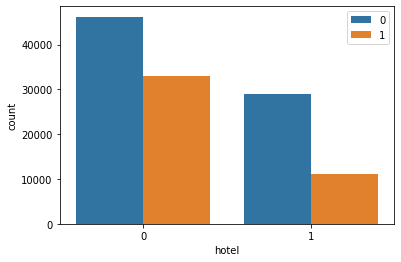

In [43]:
sns.countplot(x='hotel',hue='is_canceled',data=df)
plt.legend()

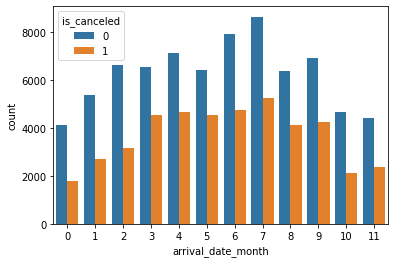

In [44]:
sns.countplot(x='arrival_date_month',hue='is_canceled',data=df)

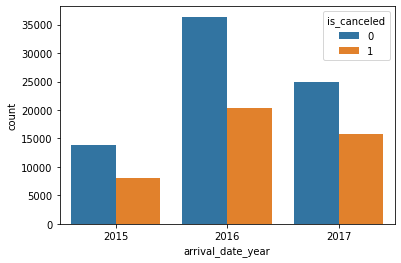

In [45]:
sns.countplot(x='arrival_date_year',hue='is_canceled',data=df)


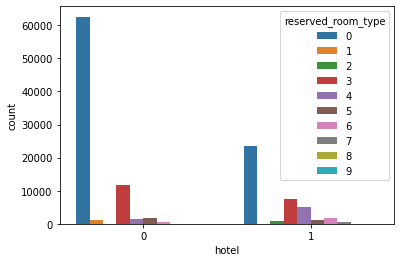

In [46]:
sns.countplot(data=df, x='hotel', hue='reserved_room_type')

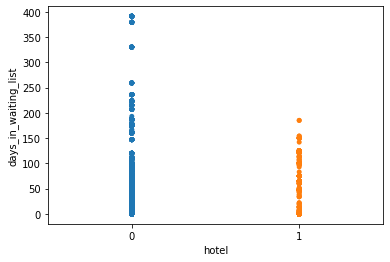

In [47]:
sns.stripplot(data=df, x='hotel', y='days_in_waiting_list', jitter=False)


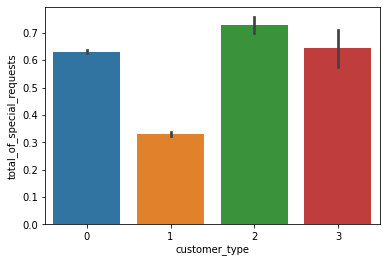

In [48]:
sns.barplot( x='customer_type', y='total_of_special_requests',data=df)

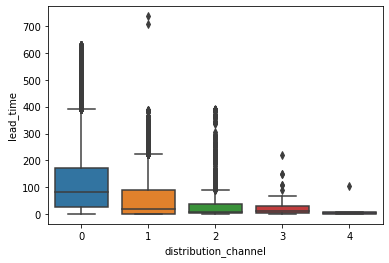

In [49]:
sns.boxplot(x='distribution_channel', y='lead_time',data=df)

In [50]:
df1 = df["market_segment"].value_counts()
df1

0    56477
1    24219
2    19811
3    12606
4     5295
5      743
6      237
7        2
Name: market_segment, dtype: int64

In [51]:
fig = pl.pie(df1,
            names = df1.index,
            values = df1.values,
            title = "Market Segment Bookings",
            template = "plotly")
fig.update_traces(textposition = "inside" , textinfo = "percent+label" )
fig.show()

In [52]:
x=df.drop(['is_canceled','reservation_status_date'],axis=1)
y=df['is_canceled']

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
lr=LogisticRegression()

In [57]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [58]:
y_pred=lr.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
a1=accuracy_score(y_test,y_pred)

In [61]:
a1

0.8429516709942206

In [62]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     15027
           1       0.81      0.76      0.78      8851

    accuracy                           0.84     23878
   macro avg       0.83      0.83      0.83     23878
weighted avg       0.84      0.84      0.84     23878



## 'hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month','arrival_date_week_number', 'arrival_date_day_of_month','stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children','babies', 'meal', 'country', 'market_segment', 'distribution_channel','is_repeated_guest', 'previous_cancellations','previous_bookings_not_canceled', 'reserved_room_type','assigned_room_type', 'booking_changes', 'deposit_type', 'agent','company', 'days_in_waiting_list', 'customer_type', 'adr','required_car_parking_spaces', 'total_of_special_requests','reservation_status'

In [64]:
p1=lr.predict([[1,7,2015,6,27,1,0,1,1,0,0,0,59,3,1,0,0,0,0,2,0,0,14,179,0,0,75,0,0,0]])
print(p1)
if p1<=0:
    print("Booking was not cancelled")
else:
    print('Booking has been cancelled')

[0]
Booking was not cancelled


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [65]:
p1=lr.predict([[1,102,2015,6,27,4,2,5,2,0,0,0,135,0,0,0,0,0,0,0,0,0,240,179,0,0,110.7,0,1,1]])
print(p1)
if p1<=0:
    print("Booking was not cancelled")
else:
    print('Booking has been cancelled')

[1]
Booking has been cancelled


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
tree=DecisionTreeClassifier()

In [68]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
y_pred=tree.predict(x_test)

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
a2=accuracy_score(y_test,y_pred)

In [72]:
a2

1.0

In [73]:
from sklearn.metrics import classification_report

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15027
           1       1.00      1.00      1.00      8851

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



## 'hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month','arrival_date_week_number', 'arrival_date_day_of_month','stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children','babies', 'meal', 'country', 'market_segment', 'distribution_channel','is_repeated_guest', 'previous_cancellations','previous_bookings_not_canceled', 'reserved_room_type','assigned_room_type', 'booking_changes', 'deposit_type', 'agent','company', 'days_in_waiting_list', 'customer_type', 'adr','required_car_parking_spaces', 'total_of_special_requests','reservation_status'

In [75]:
p2=tree.predict([[1,13,2015,6,27,1,0,1,1,0,0,0,59,4,2,0,0,0,0,0,0,0,304,179,0,0,75,0,0,0]])
print(p2)
if p2<=0:
    print("Booking was not cancelled")
else:
    print('Booking has been cancelled')

[0]
Booking was not cancelled


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [76]:
p2=tree.predict([[1,45,2015,6,27,2,1,3,3,0,0,0,135,0,0,0,0,0,3,3,0,0,241,179,0,0,108,0,1,1]])
print(p2)
if p2<=0:
    print("Booking was not cancelled")
else:
    print('Booking has been cancelled')

[1]
Booking has been cancelled


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [77]:
from sklearn.naive_bayes import GaussianNB

In [78]:
nb=GaussianNB()

In [79]:
nb.fit(x_train,y_train)

GaussianNB()

In [80]:
y_pred=nb.predict(x_test)

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
a3=accuracy_score(y_test,y_pred)

In [83]:
a3

0.9964821174302705

In [84]:
from sklearn.metrics import classification_report

In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15027
           1       0.99      1.00      1.00      8851

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



In [86]:
p3=nb.predict([[1,7,2015,6,27,1,0,1,1,0,0,0,59,3,1,0,0,0,0,2,0,0,14,179,0,0,75,0,0,0]])
print(p3)
if p3<=0:
    print("Booking was not cancelled")
else:
    print('Booking has been cancelled')

[0]
Booking was not cancelled


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



In [87]:
p3=nb.predict([[1,43,2015,6,27,2,1,3,3,0,0,0,135,0,0,0,0,0,3,3,0,0,241,179,0,0,108,0,0,1]])
print(p3)
if p3<=0:
    print("Booking was not cancelled")
else:
    print('Booking has been cancelled')

[1]
Booking has been cancelled


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rf=RandomForestClassifier()

In [90]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [91]:
y_pred=rf.predict(x_test)

In [92]:
from sklearn.metrics import accuracy_score

In [93]:
a4=accuracy_score(y_test,y_pred)

In [94]:
a4

1.0

In [95]:
from sklearn.metrics import classification_report

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15027
           1       1.00      1.00      1.00      8851

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



In [97]:
p4=nb.predict([[1,7,2015,6,27,1,0,1,1,0,0,0,59,3,1,0,0,0,0,2,0,0,14,179,0,0,75,0,0,0]])
print(p4)
if p4<=0:
    print("Booking was not cancelled")
else:
    print('Booking has been cancelled')

[0]
Booking was not cancelled


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



In [98]:
df1=pd.DataFrame({'Algorithm':['Logistic_Regression','Decision_Tree','Naive_Bayes','Random_Forest'],
                 'Accuracy':[a1,a2,a3,a4]})

In [99]:
df1

,Algorithm,Accuracy
0,Logistic_Regression,0.842952
1,Decision_Tree,1.000000
2,Naive_Bayes,0.996482
3,Random_Forest,1.000000


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

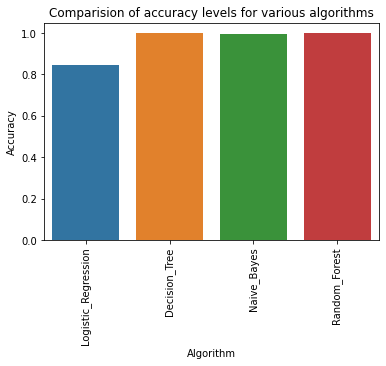

In [100]:
sns.barplot(x='Algorithm',y='Accuracy',data=df1)
plt.title("Comparision of accuracy levels for various algorithms")
plt.xticks(rotation=90)